#  Altair Examples

These examples use the Seattle bike trip dataset, as discussed by Jake Vanderpla

## Import require packages

In [6]:
import altair as alt
import pandas as pd

# used to retreive datasets
from urllib.request import urlretrieve

# used for file existance testingb
import pathlib

In [7]:
print (alt.__version__)

2.1.0


### Define data source, and local file name

In [8]:
url = 'https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD'
csv_file = '../data/fremont.csv'

### Access data, save locally (if needed)

In [9]:
data_file = pathlib.Path(csv_file)
if( data_file.exists() ):
    urlretrieve(url, csv_file)
#end if

In [10]:
# read the data set
bike_df = pd.read_csv(csv_file)

### Show original column names, then reset to shorter names

In [11]:
bike_df.columns

Index(['Date', 'Fremont Bridge West Sidewalk', 'Fremont Bridge East Sidewalk'], dtype='object')

In [12]:
bike_df.columns = ['DateString', 'West', 'East']

### Fix string date, convert to datetime timestamps

We do this as calculations (eg day of week) are much easier with DateTime objects

In [13]:
bike_df['Date2'] = pd.to_datetime(bike_df['DateString'], format='%m/%d/%Y %I:%M:%S %p')

### Create convenience columns, show the hour and year of each observation, as well as the day number since the start of dataset (a form of pseudo-Julian Day number)

In [14]:
bike_df['Year'] = bike_df['Date2'].dt.year
bike_df['Hour'] = bike_df['Date2'].dt.hour
bike_df['WeekDay'] = bike_df['Date2'].dt.dayofweek

bike_df['JulianDay'] =  ((bike_df['Date2'] - pd.datetime(2012, 10, 3)).dt.total_seconds()//(24*60*60)).astype(int)

### Save dataframe rows as json file

In order for Altair to understand the JSON file as written by Pandas, we must perform some data conversions.

For example, pandas converts all datetimes to UTC before writing to JSON, which Altair reads as local times.

In [15]:
bike2_df = alt.utils.sanitize_dataframe(bike_df)

In [16]:
json_file = 'data.json'
bike2_df.to_json(json_file, orient='records')

## Altair Charting

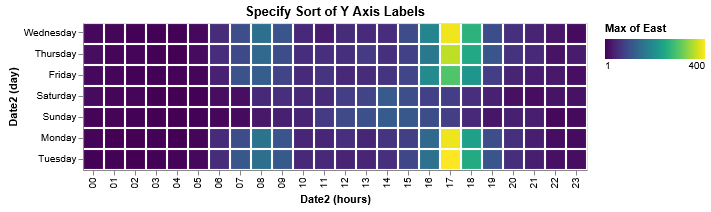

In [29]:
c1 = alt.Chart(bike2_df[0:400], title='Specify Sort of Y Axis Labels').mark_rect().encode(
    x=alt.X('Date2:T', timeUnit='hours', type='ordinal'),
    y=alt.Y('Date2:T', timeUnit='day', type='ordinal', 
            sort=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']),
    color=alt.Color('max(East):Q',   ) )
c1

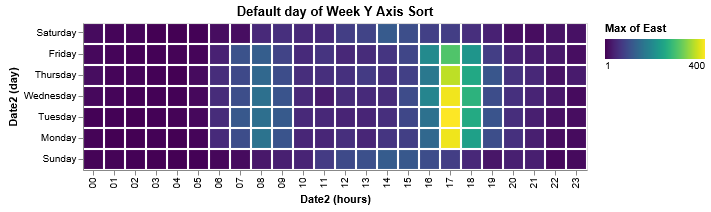

In [30]:
c2 = alt.Chart(bike2_df[0:400], title='Default day of Week Y Axis Sort').mark_rect().encode(
    x=alt.X('Date2:T', timeUnit='hours', type='ordinal'),
    y=alt.Y('Date2:T', timeUnit='day', type='ordinal', 
            sort='descending'),
    color=alt.Color('max(East):Q',   ) )
c2

In [32]:
c1.save('DayOfWeekBug1.png')

In [33]:
c2.save('DayOfWeekGood.png')